In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib import animation, rc

from lectures_helpers import animate_poly_minimization, animate_poly_minimization_with_slope, L1LinearRegression

from sklearn.linear_model import LinearRegression

%matplotlib inline

## О машинном обучении (в терминах и абстракциях)

### Что мы хотим?

**На вход**: имеющиеся данные о объекте (*объект* - это вообще что либо с чем мы работаем: картинки, люди, события, и т.д.)  
**На выход**: какая-то неочевидная из данных информация об этом объекте

#### Примеры:  
**На вход**: пиксели изображения  
**На выход**: изображен котик или собачка (для компьютера это совсем неочевидное свойство изображения)

**На вход**: вес, рост, возраст, температура, анализ крови  
**На выход**: наличие гриппа у человека

**На вход**: цены на нефть за полследний год  
**На выход**: цена на нефть завтра

<img src="pics/ML_Forward.png">

### Типы задач

Задачки можно поделить используя две разных классификации.

1) По наличию данных:
* Если у нас есть данные для обучения, которые содержат правильные предсказания. Напрмер, у нас есть картинки где известно где котики а где собачки. Такие задачки называются **обучение с учителем** или **supervised learning**
* Если у нас есть только сырые данные без примеров правильных предсказаний. Такие задачки называются **обучение без учителя** или **unsupervised learning**

2) По типу предсказаний:
* Если предсказания это какие то категории: котик/собачка, болен/не болен, красный/синий/зеленый и т.д., то такая задачка называется **классификацией**. То есть отнесение объектов к разным **классам**. Если варианта всего два (котик/собачка) то это **бинарная классификация**.
* Если предсказания это какие то численные величины: цены на нефть, температура воздуха, то такая задачка называется **регрессией**.

**Далее мы будем говорить только о задачках *обучения с учителем*.**

## Линейная регрессия

Одна из самых простых моделей для задачи регрессии - это линейная регрессия. Мы делаем предположение, что наши данные лежат на прямой в двумерном случае, на плоскости в трехмерном случае, и на гиперплоскости в большей размерности.

Если у нас есть $n$ разных измерений для объекта (**фичей** от features) $x_1, x_2, \ldots, x_n$, то предсказание $y$ считается как 

$$y = w_1x_1 + w_2x_2+\ldots+w_{n}x_{n} + c$$

Где $w_1, \ldots, w_n$ и $c$ - это параметры модели.

### Пример
Предположим у нас есть данные о цене картошки $p$ в зависимости от времени $t$.

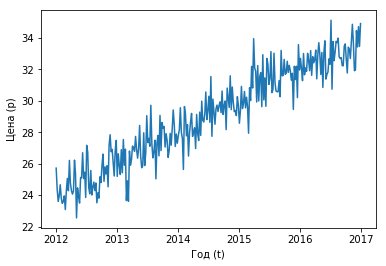

In [2]:
np.random.seed(333)
x_lr = np.linspace(2012, 2017, 300)
y_lr = 2*x_lr-4000 +np.random.normal(size=x_lr.shape)
plt.plot(x_lr,y_lr)
plt.xlabel("Год (t)")
plt.ylabel("Цена (p)")

Видно что цену можно хорошо приблизить прямой, и сделать какие то предсказания. То есть наша модель будем иметь вид 

$$p=wt+c$$

Но как понять какая прямая нам нужна, какие параметры $w$ и $c$ надо выбрать? Для этого нам нужно найти способ оценить насколько хорошо те или иные параметры нам подходят.

### Как оценить качество алгоритма?

Для оценки качества алгоритма (модели) используются **метрики** и **функции потерь** (**loss functions**). И метрики и функции потерь высчитываются на основе того, что предсказал алгоритм машинного обучения и что мы ожидали увидеть.

Метрика - это произвольная функция оценки качества: процент правильных предсказаний, отношение количества правильных предсказаний для одной категории к количеству неправильных предсказаний для другой категории и т.д.


Функция потерь это тоже метрика но с дополнительными условиями:
* Она ограничена снизу, то есть всегда больше какой-то константы $C$ вне зависимости от параметров
* Чем она больше, тем хуже наша модель
* Если она равна $C$, то наша модель идеально предсказывает
* Она непрерывна (ее график зависимости от предсказаний можно начертить не отрывая ручку от бумаги) 

<img src="pics/ML_LossFunction.png">

Функция потерь нужна, чтобы настраивать (оптимизировать) параметры модели 

**Метрики и функции потерь не зависят от алгоритма, только от типа предсказаний.** Поэтому одни и те же метрики и функции потерь  используются как в простых подходах типа линейной регрессии, так и в сложных нейронных сетях.

### Как обучить алгоритм?

Обучение - это и есть процесс настройки параметров. Для этого используется функция потерь. Так как она зависит от предсказаний, а предсказания от параметров, то мы можем попытаться найти такие значаения параметров, которые минимизируют функцию потерь, а значит улучшают нашу модель

## Об оптимизации (минимизации)

### Задача минимизации

Пускай у нас есть некотрая функция, назовем ее $f$, зависящая от параметров $x_1, x_2, \ldots, x_n$. Мы хотим найти такие значние параметров, что $f$ принимает на них минимальное значение.

В дальнейшем обозначение $f(x_1, x_2, \ldots, x_n)$ будет обозначать, что функция $f$ зависит от $x_1, x_2, \ldots, x_n$. Также обозначним  $x_1, x_2, \ldots, x_n$ одной буквой $x$. $x$ называется **вектором**, то есть упорядоченным рядом чисел (или переменных).

В новых обозначениях мы хотим найти такое $x^*$, что $f(x^*)$ минимально.

### Простой случай - один параметр

Рассмотрим просто случай когда $x$ - это одно число. Для начала рассмотрим какую-нибудь простую функцию $f(x)=x^2-2x-1$

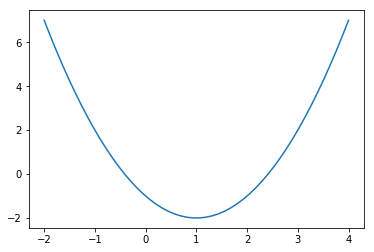

In [3]:
x=np.linspace(-2,4,50)
plt.plot(x, x**2-2*x-1)

Здесь видно, что в точке $x^*=1$ функция принимает минимальное значение равное $-2$. Это значение можно было найти и аналитически использую формулу из школьного учебника.

Теперь рассмотрим более сложный пример $f(x)=\frac{1}{14}\left(x^4+x^3-13x^2-x+19\right)$

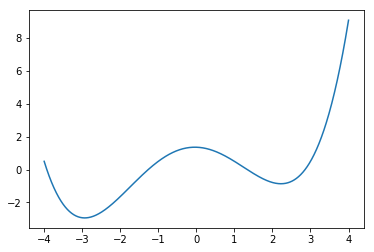

In [4]:
x=np.linspace(-4,4,1000)
coefs = np.array([19,-1,-13,1,1])/14
poly = np.polynomial.Polynomial(coefs)
plt.plot(x, poly(x))

В этом случае все еще можно найти значение функции аналитически, но будь степень побольше, это уже было бы уже невозможно. Выход - численные методы.

Наш график как бы состоит из "горок". И наш минимум функции находится внизу одной из этих горок. Назовем низы горок **локальными минимумами**, а низ горки с минимальным значением функции **глобальным минимумом**. И попытаемся теперь найти не обязательно глобальный, но хотя бы какой нибудь локальный минимум.

Это можно сделать примерно следующим образом. Положим шарик куда нибудь на нашем графике, и отпустим его. Тогда он скатится по горке вниз, прямо в локальный минимум.

In [5]:
starting_point = 0.5
animate_poly_minimization(poly, x ,starting_point)

Более детально - находясь в какой то точке графика, мы проводим касательную и делаем по ней маленький шажок в сторону уменьшения функции. И так пока касательная не станет параллельна оси $x$. Назовем наш шажок, **шагом оптимизации**.

Размер шажка будем делать пропорцинальным крутизне спуска. А крутизна спуска это на самом деле размер угла между касательной и осью $x$.

*Напоминание из школы*: Тангенс угла между касательной и осью $x$ называется **производной**. Зная производную, можно построить касательную. Так что это в общем школьные знания.

In [6]:
animate_poly_minimization_with_slope(poly, x ,starting_point)

Как же достичь глобального минимума? Увы в общем случае никак. Это большая проблема в математике и в машинном обучении. Приходится довольствоваться локальными минимумами. Впрочем люди придумывают методы чтобы "выпрыгивать" из одних локальных оптимумов, надеясь попасть в другие, более хорошие (с меньшим значением функции).

Есть также отдельный класс функций - выпуклые. У них всегда один минимум - он же локальный, он же и глобальный (Но обратное не верно, не все функции с одним минимумом - выпуклые).

### Много параметров

В случае многих параметров (или как говорят в математике, в случае многомерного пространства), подход  почти точно такой же. В трехмерном случае мы проводим касательную плоскость, а в больших размерностях гиперплоскость (не надо представлять - не получится) и движимся в сторону наибольшего убывания функции (в сторону где у горки самая больша крутизна спуска).


### Так зачем все это?

Минимизация нам нужна чтобы обучить нашу модель. 

У нас есть функция потерь, назовем ее $L$, зависящая от параметров модели $\theta_1, \theta_2, \ldots, \theta_n$. Как мы решили раньше - чем меньше $L$, тем качественней модель. Поэтому минимизируя $L(\theta)$ мы улучшаем нашу модель или, сказав по другому, *обучаем* ее.

Поэтому процесс обучения модели можно представить как серию оптимизационных шагов, в каждом из которых мы движемся в сторону уменьшения значения функции потерь, немного изменяя значения параметров, пока функция потерь не перестанет уменьшаться. 

<img src="pics/ML_Train.png">



### Назад к линейной регрессии

Итак у нас есть измерения цен картошки в разное время, обозначим эти измерения парами $(t_1,p_1),\ldots,(t_n,p_n)$. В момент $t_i$ наша модель выдаст цену $wt_i+c$, но мы знаем, что цена была $p_i$. Тогда ошибку можно посчитать как 

$$(p_i-(wt_i+c))^2$$

Почему в квадрате? Во-первых это позволяет нам извабиться от знака ошибки - нам не так важно, наше предсказание больше или меньше реального значения, нам важно лишь насколько оно неточное. Во-вторых квадрат имеет несколько хороших математических свойств в отличие от просто абсолютного значения, поэтому он предпочтительней. Более того, когда используют термин "линейная регрессия" имеют ввиду именно квадратичную ошибку.

Теперь мы можем определить функцию потерь как сумму ошибок на всех имеющихся данных

$$L(w,c)=\sum_{i=1}^n (p_i-(wt_i+c))^2$$

Это и вправду функция потерь так как:
* Она больше 0
* Чем она больше, тем больше ошибки, тем хуже наша модель
* Если она равна нулю, то все ошибки равны нулю, а значит мы идеально предсказываем
* Она непрерывна (believe me)

Теперь мы можем минимизировать $L$ и тем самым найти оптимальные параметры $w$ и $c$

Real: w: 2, c: -4000
Regression: w: 1.984323444055998, c: -3968.4117680260333


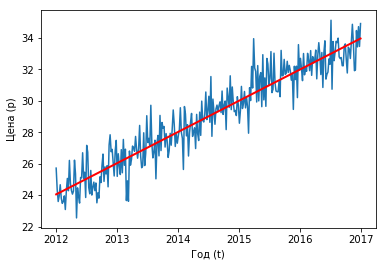

In [11]:
lr = LinearRegression()
lr.fit(x_lr.reshape(-1,1),y_lr)
plt.plot(x_lr,y_lr)
plt.plot(x_lr, lr.predict(x_lr.reshape(-1,1)), color ='red', lw=2)

print("Real: w: {0}, c: {1}".format(2, -4000))
print("Regression: w: {0}, c: {1}".format(lr.coef_[0], lr.intercept_))

plt.xlabel("Год (t)")
plt.ylabel("Цена (p)")

А вот что будет если использовать абсолютное значение в качестве ошибки

$$L(w,c)=\sum_{i=1}^n \left|p_i-(wt_i+c)\right|$$

Real: w: 2, c: -4000
Regression: w: 2.0301244862257346, c: -4060.7306353584295


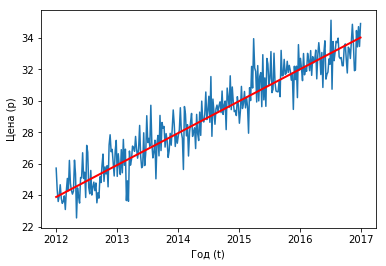

In [12]:
lr_l1 = L1LinearRegression()
lr_l1.fit(x_lr,y_lr)
plt.plot(x_lr,y_lr)
plt.plot(x_lr, lr_l1.predict(x_lr), color ='red', lw=2)

print("Real: w: {0}, c: {1}".format(2, -4000))
print("Regression: w: {0}, c: {1}".format(lr_l1.w, lr_l1.c))

plt.xlabel("Год (t)")
plt.ylabel("Цена (p)")

Визуально результат похожий, но коэффециэнты получились другие. На других задачках, особенно где больше размерность (количество измерений для одного объекта), результаты могут отличаться значительно.

### Что мы скрыли?

* Как находить производные? (Ответ: используя таблицы производных и простые правила) 
* Как находить касательную гиперплость и направление наибольшего убывания? (Ответ: по формулам, используя производные)
* Всегда ли шарик скатится вниз горки? (Ответ: нет, но есть простые способы отследить и избежать "застревания")
* Линейная регрессия одна из немногих моделей, для которых результат оптимизации можно посчитать аналитически, а не итеративно

## Что дальше?
* Линейные модели для бинарной классификации
* Логистическая регрессия
* Простая нейронная сеть

## Бонус

### О параметрах и гиперпараметрах

Алгоритмы машинного обучения имеют два типа параметров: **настраиваемые** (learnable) и **гиперпараметры**. Настраевымые параметры настраиваются автоматически самим алгоритмом на основе данных во время этапа обучения (после него наступает этап предсказания). Собственно этап обучения это и есть настройка параметров. Настраиваемые парметры также еще называют **весами**.

Гиперпараметры устанавливаются вручную "раз и навсегда" перед обучением человеком. Такие параметры как правило нельзя эффективно настроить при помощи данных.

Есть некоторые простые правила по которым как правило можно отличить настраевымые параметры от гиперпараметров
* Если параметр принимает только целые значения (1,2,3,... но не 1/2) то это гиперпараметр
* Если параметр отвечает за то, чтобы наша модель не переобучалась (не слишком подгонялась под тренировочные данные, получая в итоге плохой результат на новых данных), то это гиперпараметр.
* В остальных случаях это как правило настраиваемый параметр

Если у алгоритма есть только гиперпараметры (или никаких параметров вообще нет), то так как нечего оптимизировать можно использовать любую метрику, не обязательно функцию потерь.  

Для алгоритмов с настраиваемыми параметрами чаще всего используют одну функцию потерь для настройки параметров и какую нибудь другую *не непрерывную* метрику для оценки качества.

Рассмотример пример. Мы хотим предсказывать цену на нефть сегодня. Предположим, что на нефть сегодня зависит только от $n$ предыдущих дней (с большой точностью). Тогда можно придумать простую модель - в котором цена завтра, это среднее цен за предыдущие $n$ дней взятых с какими то весами. Обозначим цену нефти $i$ дней назад как $p_i$ (от слова price). То есть $p_0$ - это цена сегодня, $p_1$ - это цена вчера, $p_2$ - это цена позавчера и т.д. А веса для каждого из дней обозначим как $w_i$. Тогда мы можем предсказать цену сегодня как

$$p_0 = \frac{1}{n}(w_1p_1 + w_2p_2+\ldots+w_{n}p_{n})$$

Или используя знак суммации $\sum$

$$p_0 = \frac{1}{n}\sum_{i=1}^n w_ip_i$$

Цены за предыдущие дни $p_1, p_2, \ldots, p_n$ мы знаем. А вот $n$ и $w_1, w_2, \ldots, w_n$ - это параметры, которые нам надо подобрать. $w$ - в данном случае это настраиваемый параметр, так как он может быть нецелым. В то время как само $n$, количество используемых дней, это гиперпараметр, так как оно принимает только целые значения.